Ed Carlos Santos - Estudo, uso de Python em diagnóstico de Diabetes Usando uma base menor de testes

#**Detalhes do trabalho**

Contexto:  
Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever com diagnóstico se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.



Conteúdo:  
Os conjuntos de dados consistem em várias variáveis ​​preditoras médicas e uma variável de destino, Resultado "Outcome". As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.

Fonte dos dados:   https://www.kaggle.com/uciml/pima-indians-diabetes-database
     
Fonte dos códigos : https://www.kaggle.com/uciml/pima-indians-diabetes-database/code

 https://www.kaggle.com/theblackmamba31/diabetes-prediction

https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook

#**Entrada da base de análise**

In [1]:
# fonte https://www.kaggle.com/theblackmamba31/diabetes-prediction
# Ed Carlos Santos Teste Diabetes 01
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline
#!wget https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv
data = pd.read_csv("diabetes.csv")

#**Raio-X dos dados**

In [2]:
print("registros , colunas = ", data.shape)
print("\n Nomes das colunas \n", data.columns) ## to see all the columns present in the data
print("\n Tipos de dados  \n\n ", data.dtypes)
print("\n\n Tipo e Contagem e nulos")
print( data.info())
## to see null value
nulos = data.isna().sum()
print("\n Dados nulos \n", nulos)
ebool = data.isna().any()
print("\n Dados booleanos \n", ebool)
print("\n\n tabela parcial\n")
print("\n\n informacoes complementares \n\n", data.describe())
print("\n\n Planilha \n\n" , data.head())

registros , colunas =  (768, 9)

 Nomes das colunas 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

 Tipos de dados  

  Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


 Tipo e Contagem e nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness 



Pregnancies - Gestações

Glucose - Nível de glicose

Blood Pressure - Pressão sanguínea

SkinThickness - Espessura da Pele

Insulin - Nível de insulina

BMI -  índice de massa corporal 

Diabetes Pedigree Function (DPF), valores que medem a tendência ao desenvolvimento de diabetes com base nas relações genéticas do indivíduo.

Age - Idade

Outcome - Resultado -> 1 - Positivo   0 - Negativo

Apontamentos

Falta de valores de Referência de padrões normais

Talvez poderiam incluir teste de hemoglobina clicada

Não é especificado se a auseência de diabetes era em indivíduos saudáveis ou se poderiam ter alguma outra patologia.

In [3]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Análise e visualização

In [5]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [7]:
def outliers(data):
    for column_name in data.columns:
        q1 = data[column_name].quantile(0.25)
        q3 = data[column_name].quantile(0.75)
        iqr = q3-q1
        lower_limit = q1-1.5*iqr
        upper_limit = q3+1.5*iqr
        print(f"{column_name}>>Lower_limit:{lower_limit} \n Upper_limit:{upper_limit}")
        data = data[(data[column_name]>lower_limit)&(data[column_name]<upper_limit)]
        
    return data

df = outliers(data)

Pregnancies>>Lower_limit:-6.5 
 Upper_limit:13.5
Glucose>>Lower_limit:37.5 
 Upper_limit:201.5
BloodPressure>>Lower_limit:35.0 
 Upper_limit:107.0
SkinThickness>>Lower_limit:-49.5 
 Upper_limit:82.5
Insulin>>Lower_limit:-198.0 
 Upper_limit:330.0
BMI>>Lower_limit:13.699999999999994 
 Upper_limit:49.70000000000001
DiabetesPedigreeFunction>>Lower_limit:-0.30737499999999995 
 Upper_limit:1.165625
Age>>Lower_limit:-0.75 
 Upper_limit:65.25
Outcome>>Lower_limit:-1.5 
 Upper_limit:2.5


<Axes: title={'center': 'Label Distribution'}, xlabel='Outcome'>

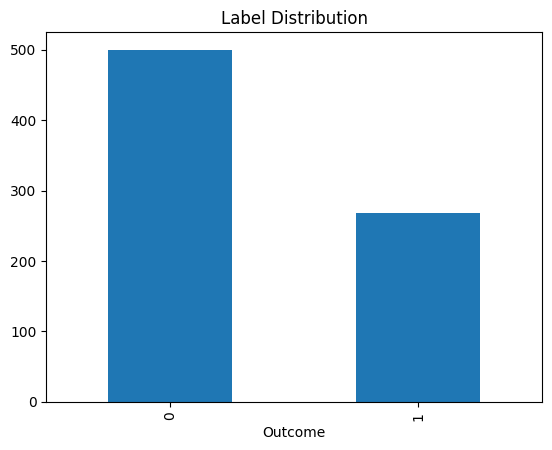

In [8]:
#sns.countplot(data.Outcome,data=data)
#plt.show()

data['Outcome'].value_counts().plot(kind = 'bar', title = 'Label Distribution')


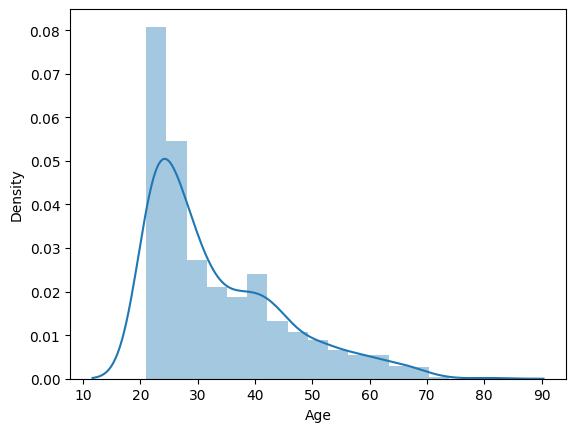

In [9]:
sns.distplot(data['Age'],kde=True)
plt.show()

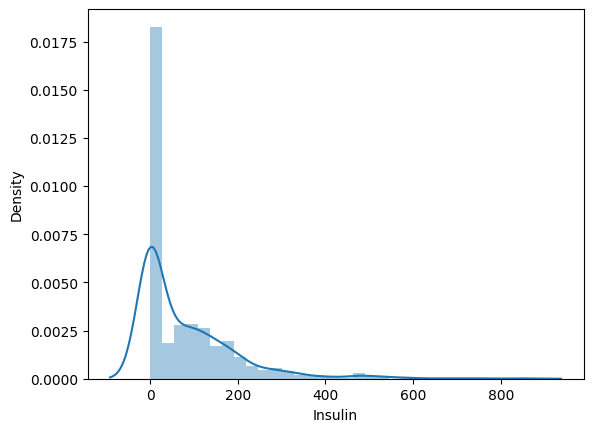

In [10]:
sns.distplot(data['Insulin'],kde=True)
plt.show()

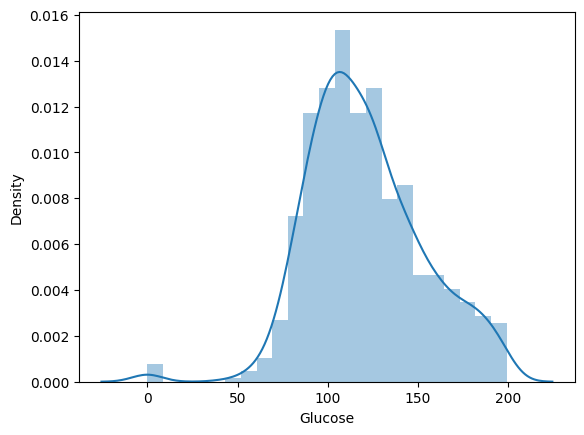

In [11]:
sns.distplot(data['Glucose'],kde=True)
plt.show()

<Axes: >

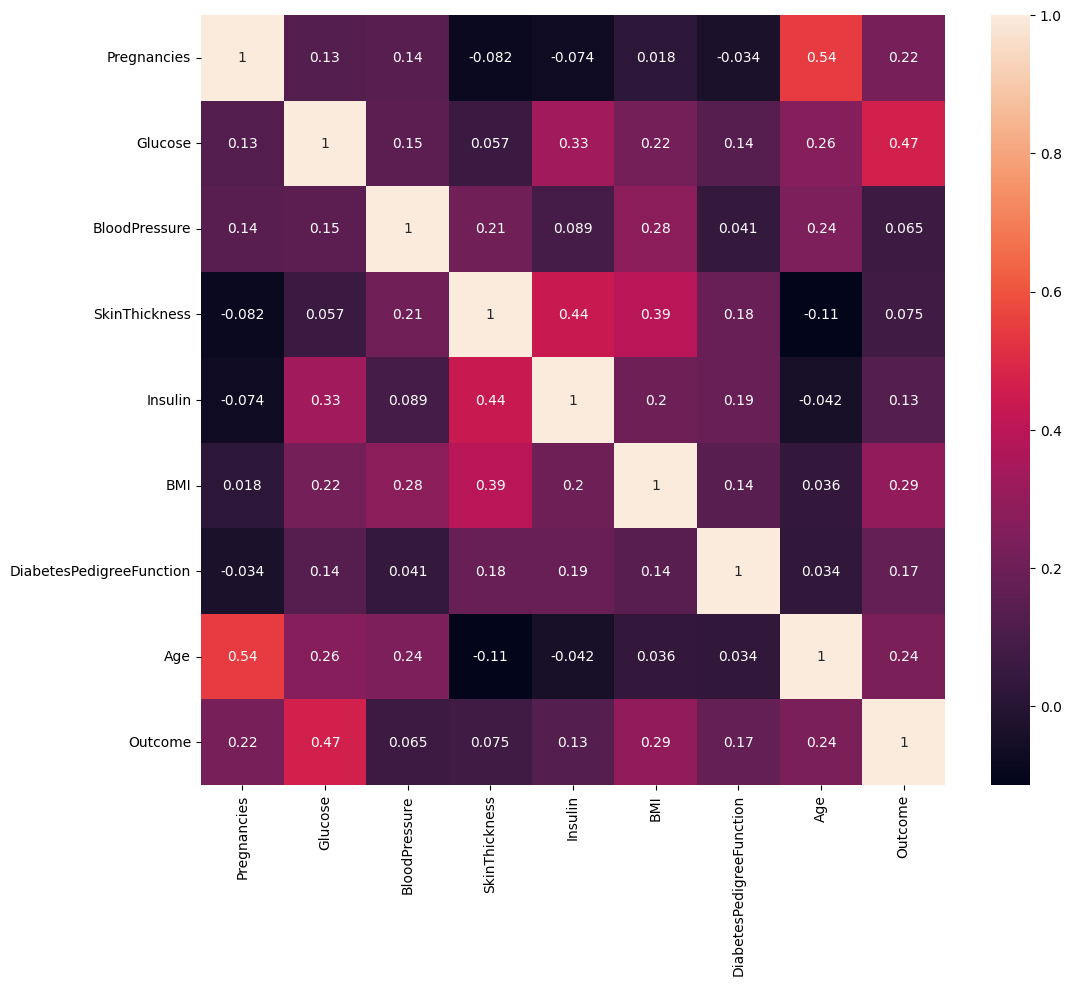

In [12]:
correlation = data.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation,annot = True)

<Axes: >

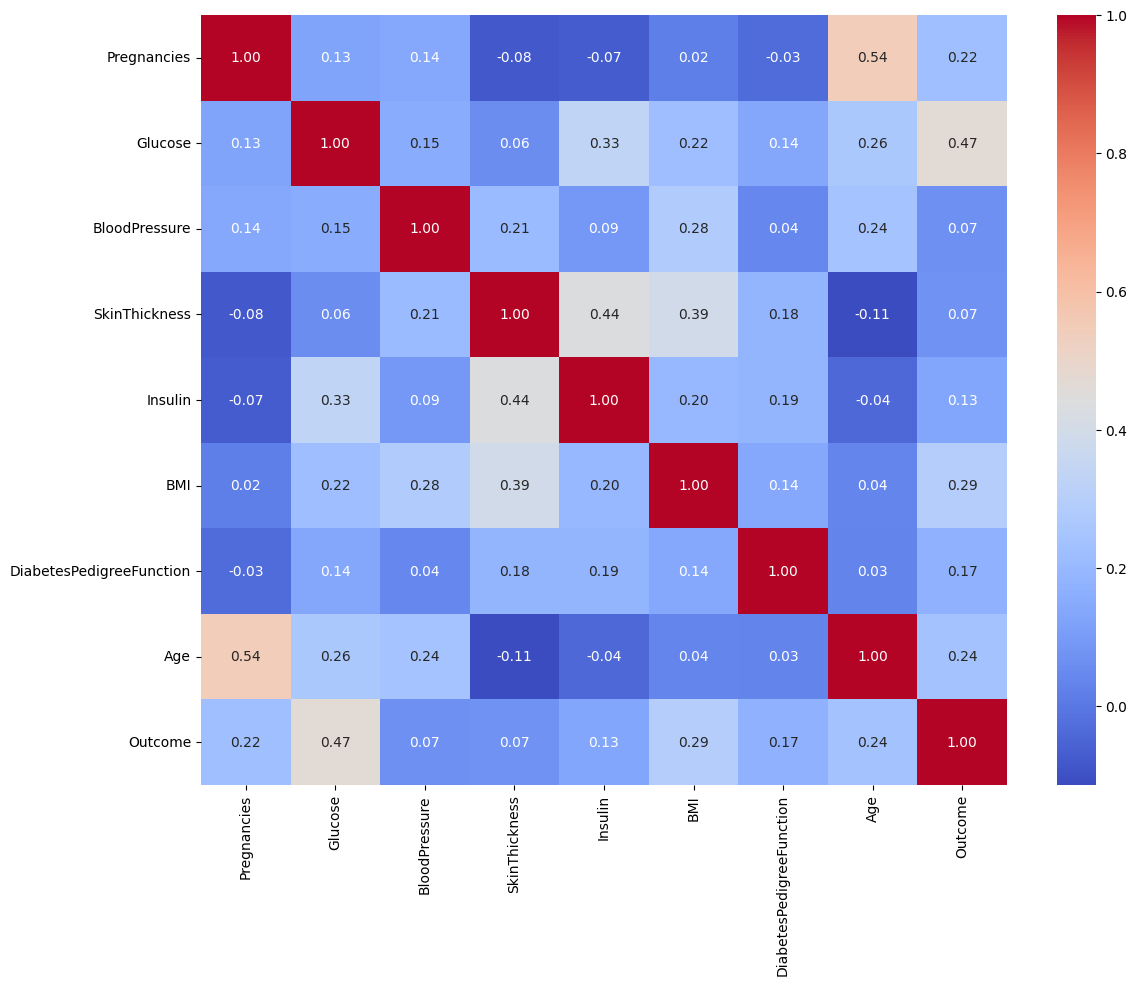

In [13]:
# fonte   https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

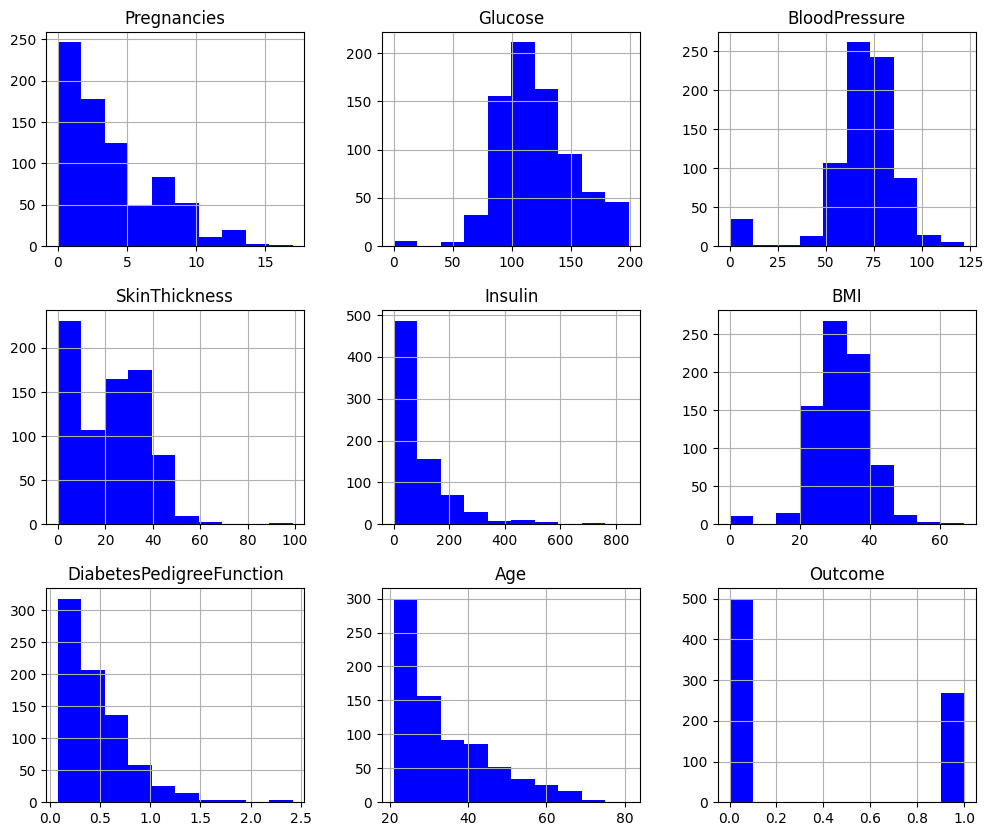

In [14]:
data.hist(figsize = (12,10),color = 'blue')
plt.show()

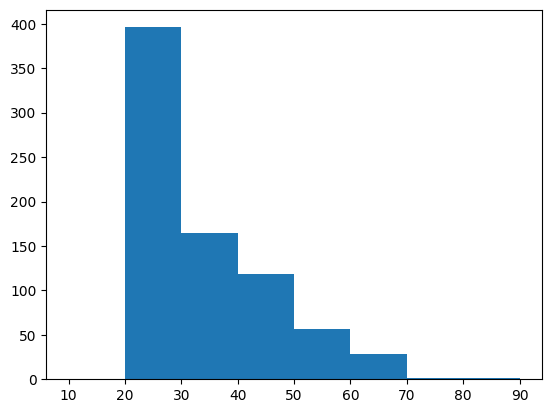

In [15]:
plt.hist(data.Age,bins = [10,20,30,40,50,60,70,80,90])
plt.show()

In [16]:
data.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

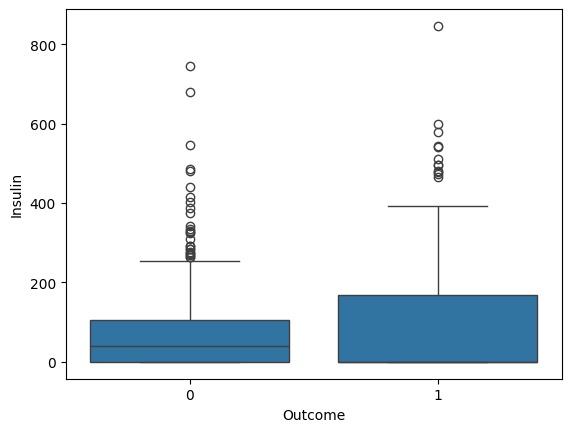

In [17]:
# box plot between outcome and insulin
sns.boxplot(x='Outcome',y='Insulin',data=data)
plt.show()

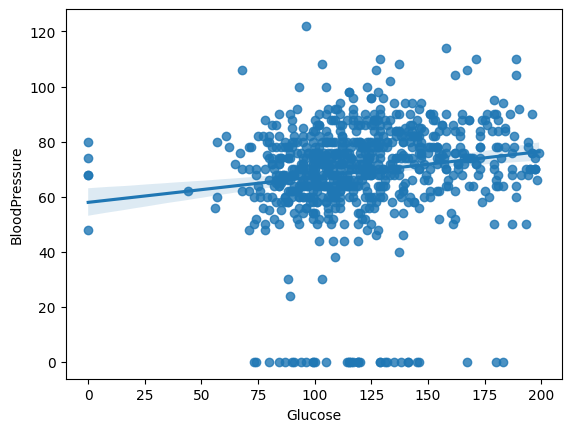

In [18]:
# scatter plot between glucose and  Blood pressure with regression line
sns.regplot(x = "Glucose",y = "BloodPressure",data = data)
plt.show()

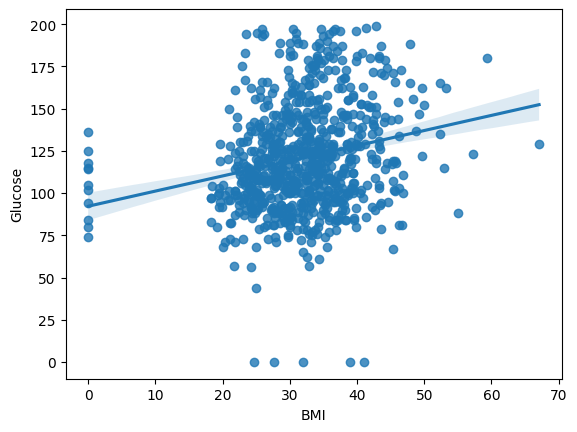

In [19]:
sns.regplot(x='BMI', y= 'Glucose', data=data)
plt.show()

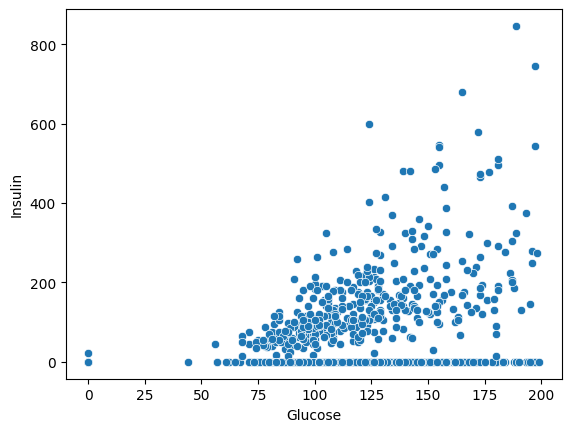

In [22]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data) # scatter plot
plt.show()

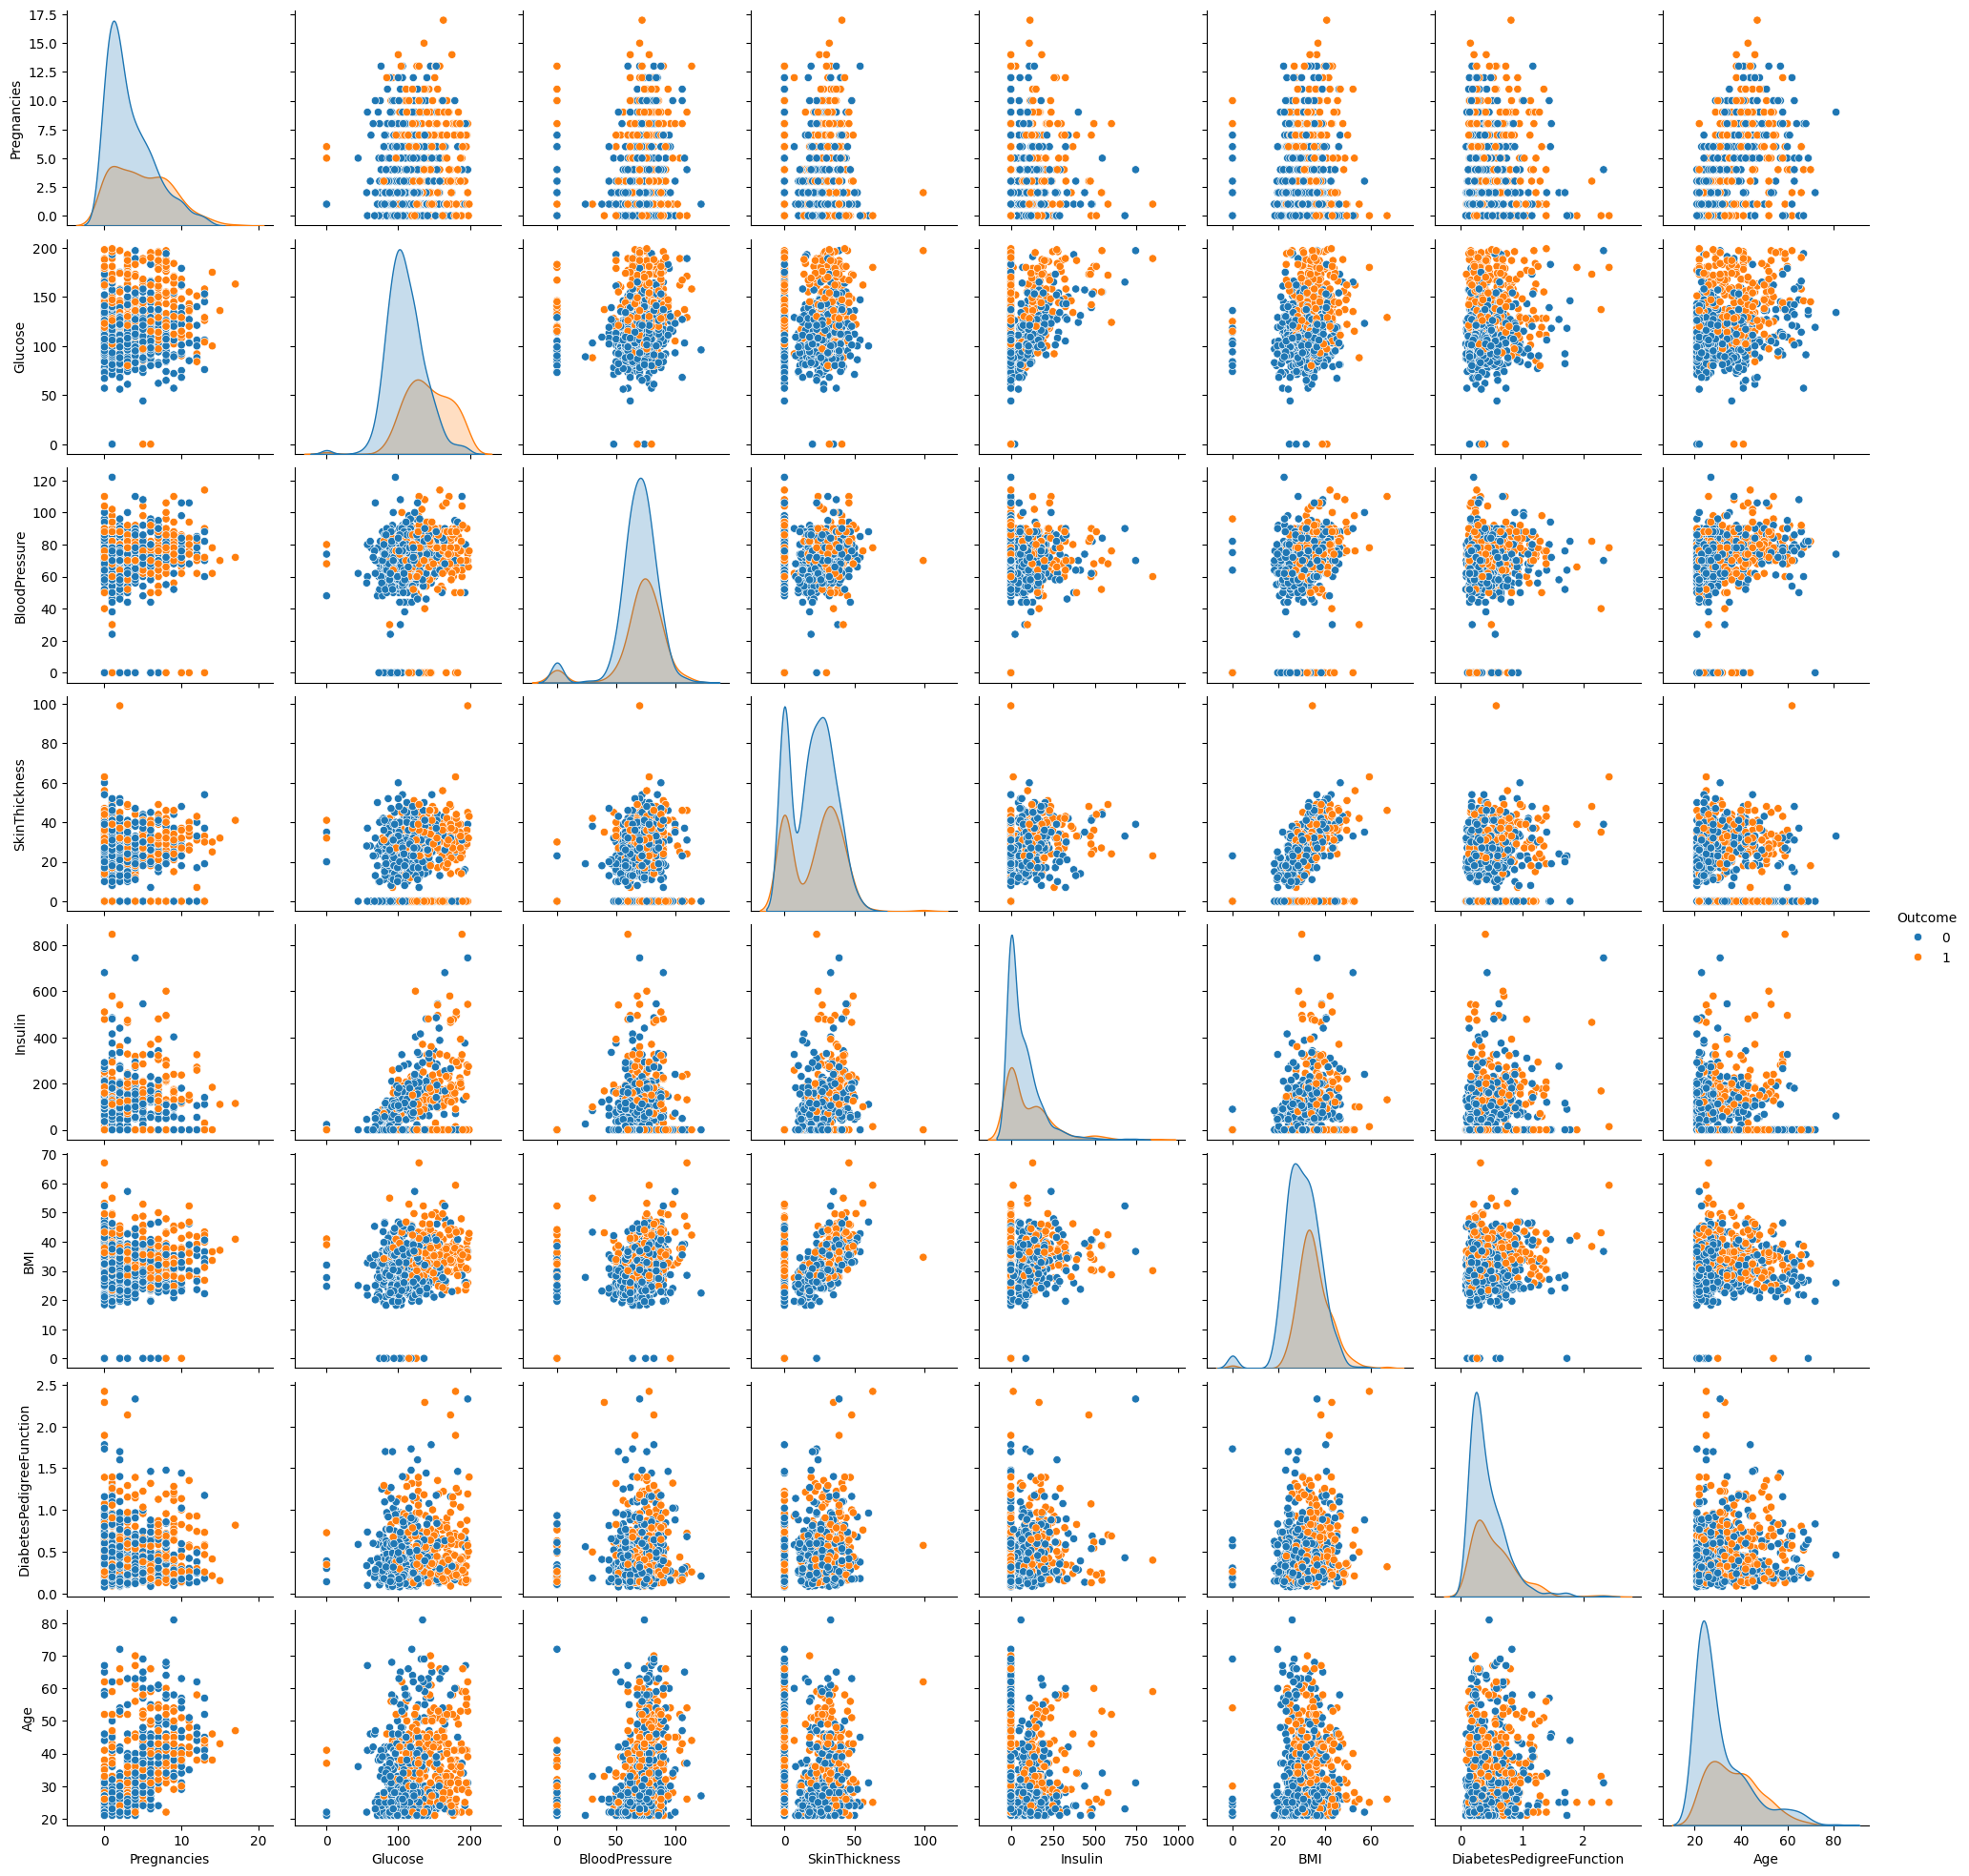

In [20]:
sns.pairplot(data,hue='Outcome')
plt.show()

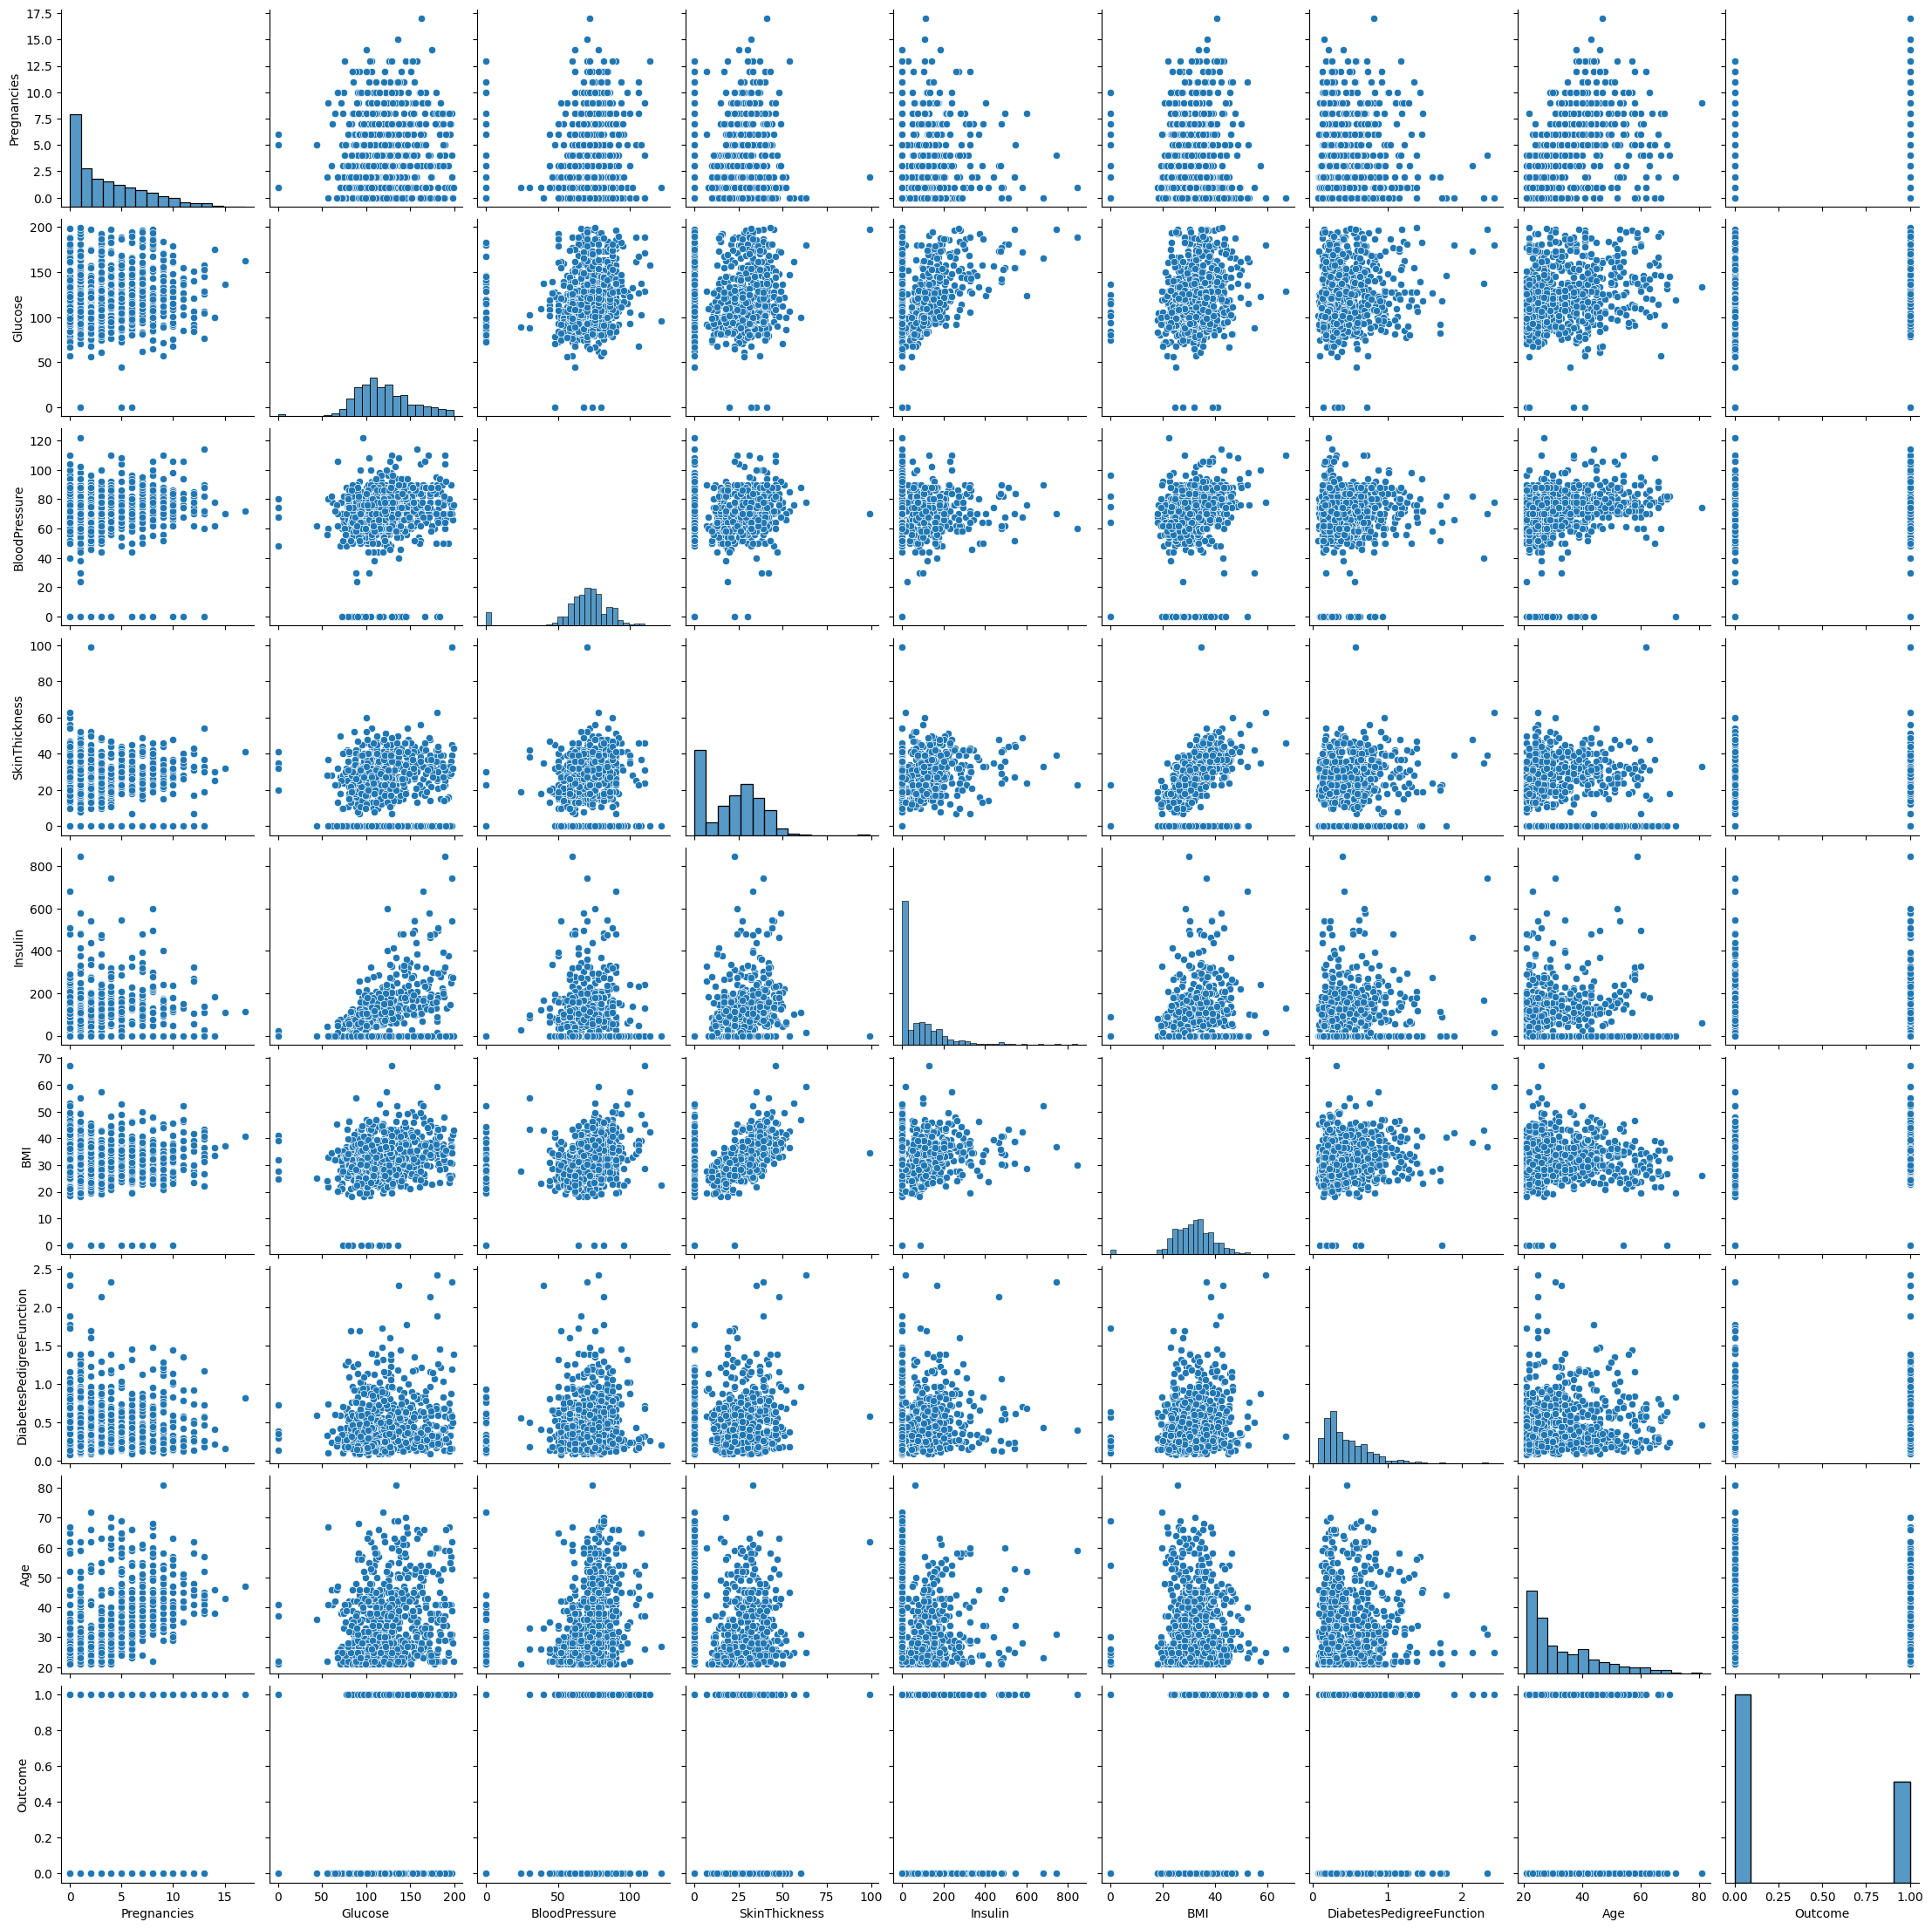

In [21]:
sns.pairplot(data)
plt.show()

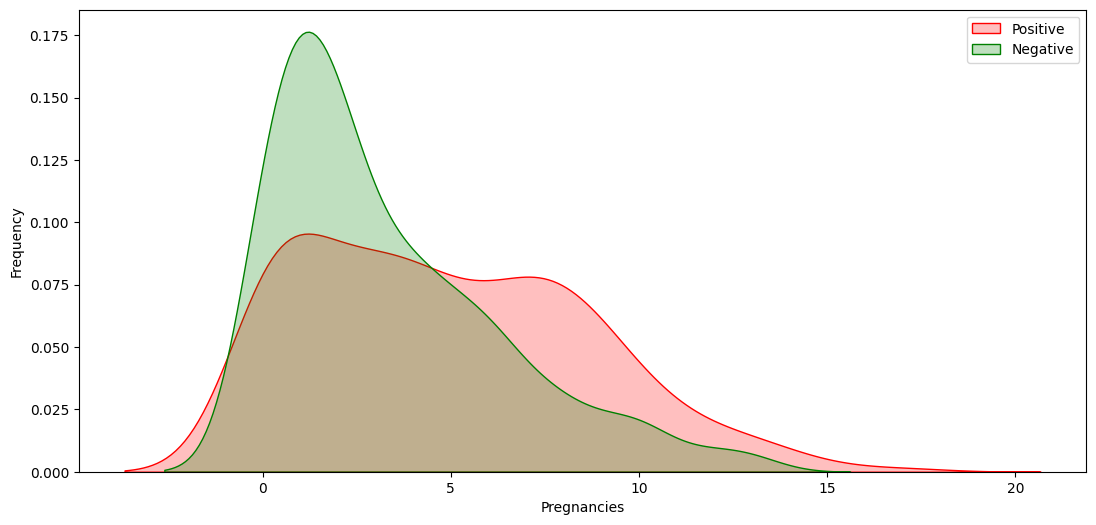

In [22]:
# fonte https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook
# Explore Age vs DEATH_EVENT
plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

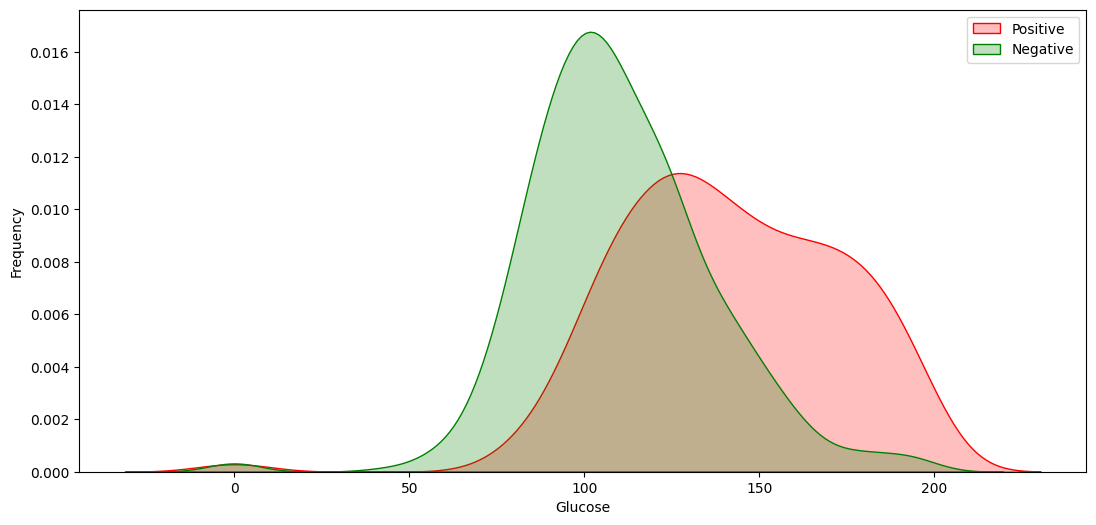

In [23]:
# Explore Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

#**SMOTE**

##**0 Balanceamento SMOTE**



SMOTE (Synthetic Minority Over-sampling Technique)

Consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos.

fonte

https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

(1000, 8) (1000,)


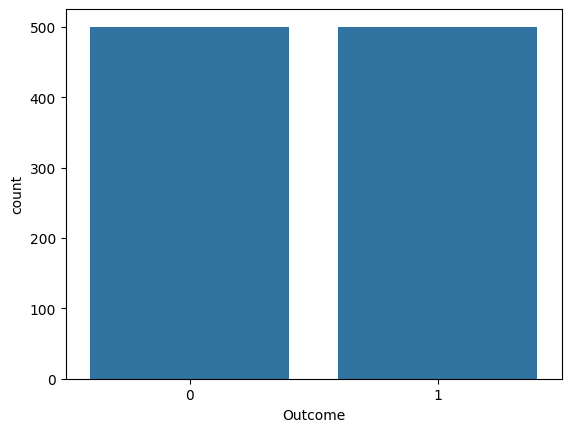

In [25]:
# https://www.kaggle.com/muskanmittal20/diabetes-pred
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE #to correct skewness

x_smote = data.drop(columns = "Outcome", axis=1)
y_smote = data["Outcome"]

smote = SMOTE()
x,y = smote.fit_resample(x_smote,y_smote)
print(x.shape,y.shape)
ax = sns.countplot(x=y)

##**Train Test Split - CONFIGURAR PARA ALIMENTAR TODOS OS TESTES DESTE BALANCEAMENTO**

In [26]:
#x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
#train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)

#train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
# train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.3, random_state=32)

train_x,test_x,train_y,test_y = train_test_split(x_smote,y_smote, test_size=0.2, random_state=2)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(614, 8) (154, 8) (614,) (154,)


##**1 SVC SMOTE**



In [ ]:
x_smote = data.iloc[:,:8]
y_smote = data.iloc[:,8]

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


###
# Scaling the data.

# where, μ = mean and 𝛔 = standard deviation
###


scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_smote)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,y_smote,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)


# defining our model
model = SVC()
print("Test type ", model.fit(train_x,train_y))
# training accuracy
X_train_predicted = model.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))
# prediction for test data
predicted = model.predict(test_x)
svm_test_score = accuracy_score(test_y,predicted)
print("acuracia",svm_test_score)
print(classification_report(test_y,predicted))
print(confusion_matrix(test_y,predicted))

#

# pd.DataFrame(standardized_data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']).head()


Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test type  SVC()
Accuracy of training data is:  0.8342644320297952
acuracia 0.7489177489177489
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       147
           1       0.70      0.54      0.61        84

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

[[128  19]
 [ 39  45]]


##**2 Regressão Logística SMOTE**

In [33]:
from sklearn.linear_model import LogisticRegression
#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_smote)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,y_smote ,test_size = 0.3,random_state = 32)
# train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#

lr = LogisticRegression()
lr.fit(train_x,train_y)
print("Test Type",lr.fit(train_x,train_y))

# training accuracy
X_train_predicted = lr.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

# prediction for test data
predicted = lr.predict(test_x)
lr_test_score = accuracy_score(test_y,predicted)
print("Prediction for test data is : ",lr_test_score)
print("\n Relatorrio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))


Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test Type LogisticRegression()
Accuracy of training data is:  0.7802607076350093
Prediction for test data is :  0.7662337662337663

 Relatorrio de classificação 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.73      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231


 Confusion Matrix 
 [[130  17]
 [ 37  47]]


##**3 Random Forest SMOTE**

In [34]:
from sklearn.ensemble import RandomForestClassifier


#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_smote)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,y_smote,test_size = 0.3,random_state = 32)
# train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#


rf = RandomForestClassifier(n_estimators = 50,max_leaf_nodes = 66,max_samples = 66)
rf.fit(train_x,train_y)
print("Test type",rf.fit(train_x,train_y))

# training accuracy
X_train_predicted = rf.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

# prediction for test data
predicted = rf.predict(test_x)
rf_test_score = accuracy_score(test_y,predicted)
rf_test_score
print("Prediction for test data is : ",rf_test_score)
print("\n Relatorrio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test type RandomForestClassifier(max_leaf_nodes=66, max_samples=66, n_estimators=50)
Accuracy of training data is:  0.8379888268156425
Prediction for test data is :  0.7575757575757576

 Relatorrio de classificação 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       147
           1       0.73      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231


 Confusion Matrix 
 [[130  17]
 [ 39  45]]


##**4 Árvore de Decisão SMOTE**

In [36]:
from sklearn.tree import DecisionTreeClassifier

#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_smote)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,y_smote,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#

dt = DecisionTreeClassifier(criterion='entropy',min_samples_split = 6, min_samples_leaf = 25)
dt.fit(train_x,train_y)
print("Test type",dt.fit(train_x,train_y))

# training accuracy
X_train_predicted = dt.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

# prediction for test data
predicted = dt.predict(test_x)
dt_test_score = accuracy_score(test_y,predicted)
print("Prediction for test data is : ",dt_test_score)
print("\n Relatorrio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))


Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test type DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25,
                       min_samples_split=6)
Accuracy of training data is:  0.7858472998137802
Prediction for test data is :  0.7575757575757576

 Relatorrio de classificação 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       147
           1       0.67      0.65      0.66        84

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231


 Confusion Matrix 
 [[120  27]
 [ 29  55]]


##**5 KNN SMOTE**

In [37]:
from sklearn.neighbors import KNeighborsClassifier



#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_smote)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,y_smote,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#


neighbors = [1,2,3,5,7,9,10,12,15,19,21]
test_scores = []
train_scores = []

for i in neighbors:

    knn = KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    
    train_scores.append(knn.score(train_x,train_y))
    test_scores.append(knn.score(test_x,test_y))

    ind=np.argmax(test_scores)

# coressponding train and test scores
print("Test score: ",test_scores[ind])
print("Train score: ",train_scores[ind])    

# prediction for test data
predicted = knn.predict(test_x)
knn_test_score = accuracy_score(test_y,predicted)
knn_test_score
print("Prediction for test data is : ",knn_test_score)
print("\n Relatorio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test score:  0.7662337662337663
Train score:  0.7690875232774674
Prediction for test data is :  0.7619047619047619

 Relatorio de classificação 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       147
           1       0.75      0.51      0.61        84

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231


 Confusion Matrix 
 [[133  14]
 [ 41  43]]


##**6 Comparando os modelos SMOTE**

In [38]:
# comparing our all models
models = {"SVC":svm_test_score, 
          "Logistic Regression":lr_test_score,
          "Random Forest":rf_test_score,
          "Decision Tree": dt_test_score,
          "KNN":knn_test_score}
          
model = pd.DataFrame({"Models":['SVC',"Logistic Regression","Random Forest","Decision Tree","KNN"],
                     "Score":[svm_test_score,lr_test_score,rf_test_score,dt_test_score,knn_test_score]},index = np.arange(1,6))
model.head(5)


Models     Score
1                  SVC  0.748918
2  Logistic Regression  0.766234
3        Random Forest  0.757576
4        Decision Tree  0.757576
5                  KNN  0.761905

In [39]:
model.sort_values(by='Score',ascending = False)
## Ranquear os modelos

Models     Score
2  Logistic Regression  0.766234
5                  KNN  0.761905
3        Random Forest  0.757576
4        Decision Tree  0.757576
1                  SVC  0.748918

Código único de teste

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)


CrossValMeans  CrossValerrors                      Models
0       0.772781        0.047931          LogisticRegression
1       0.703669        0.081912      DecisionTreeClassifier
2       0.707477        0.075757          AdaBoostClassifier
3       0.755835        0.056699                         SVC
4       0.768868        0.056454      RandomForestClassifier
5       0.770894        0.049098  GradientBoostingClassifier
6       0.726310        0.046328        KNeighborsClassifier

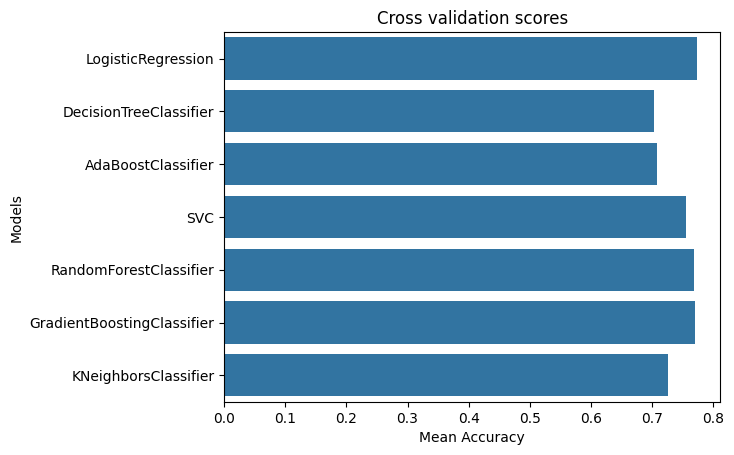

In [40]:
# Modeling fonte : https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook

from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

## Separate train dataset and test dataset
features = data.drop(["Outcome"], axis=1)
labels = data["Outcome"]
# x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)
#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_smote)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,y_smote,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#
# Cross validate models

def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = train_x, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

    # Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

##**7 Hyperparameter Tuning SMOTE**

In [41]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = test_y, grid_result.predict(test_x)
    print(classification_report(y_true, y_pred))
    

In [42]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(train_x, train_y)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7763636363636364
0.776 (+/-0.253) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776 (+/-0.253) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.776 (+/-0.253) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776 (+/-0.253) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.254) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773 (+/-0.259) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.769 (+/-0.246) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.763 (+/-0.264) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.756 (+/-0.216) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759 (+/-0.265) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1  

In [43]:
# Define models and parameters for SVC
model = SVC()

# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(train_x, train_y)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

Tuned hyperparameters: (best parameters)  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy : 0.7821741663430062
0.657 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.657 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.773 (+/-0.059) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.657 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.782 (+/-0.055) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.773 (+/-0.059) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.769 (+/-0.051) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.780 (+/-0.059) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.778 (+/-0.062) for {'C': 1, 'kernel': 'linear'}
0.780 (+/-0.059) for {'C': 10, 'kernel': 'linear'}
0.782 (+/-0.055) for {'C': 100, 'kernel': 'linear'}
0.782 (+/-0.055) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       147
           1   

In [44]:
# Define models and parameters for  Random forest
model = RandomForestClassifier(random_state=42)


# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(train_x, train_y)

# SVC Hyperparameter Result
analyze_grid_result(grid_result)

Tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy : 0.7784497586417356
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.762 (+/-0.051) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.758 (+/-0.059) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.758 (+/-0.036) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.765 (+/-0.044) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.764 (+/-

In [46]:
# prediction
y_pred = logi_result.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.73      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



##**8 Anotações SMOTE**

In [ ]:
# se tivéssemos missing values poderiamos usar o código a seguir

# df.dropna(inplace = True)
# df.head()

# se tívéssemos dados não numéricos poderiamos usar o método a seguir

#df["default"] = df["default"].map({"no":0,"yes":1})
#df["housing"] = df["housing"].map({"no":0,"yes":1})
#df["loan"] = df["loan"].map({"no":0,"yes":1})
#df["y"] = df["y"].map({"no":0,"yes":1})
#df.education = df.education.map({"primary": 0, "secondary":1, "tertiary":2})
#df.poutcome = df.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
#df.contact = df.contact.map({"cellular": 0, "unknown":1, "telephone":2})
#df.month = pd.to_datetime(df.month, format = "%b").dt.month

In [ ]:
# https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook
# outros metodos

#comprar dado com
# dados faltantes analise

#**NEARMISS**

##**0 Balanceamento NEARMISS**

Aplicando NearMiss

 É um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância.

Teste depois do balanceamento NearMiss

https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/


https://www.kaggle.com/muskanmittal20/diabetes-pred

(536, 8) (536,)


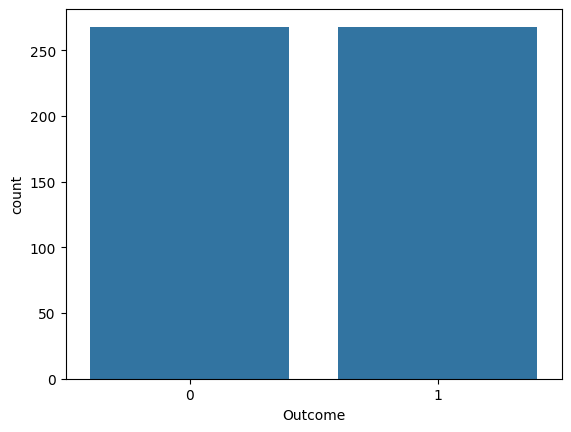

In [47]:
# Importando os módulos:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.under_sampling import NearMiss
import seaborn as sns

x = data.drop(columns = "Outcome", axis=1)
y = data["Outcome"]

near = NearMiss()
x, y = near.fit_resample(x, y)
print(x.shape,y.shape)
ax = sns.countplot(x=y)

##**Train Test Split - CONFIGURAR PARA ALIMENTAR TODOS OS TESTES DESTE BALANCEAMENTO**

In [48]:
#x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
#train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)

#train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
# train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.3, random_state=32)

train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(428, 8) (108, 8) (428,) (108,)


##**1 SVC NEARMISS**



In [49]:
X = data.iloc[:,:8]
Y = data.iloc[:,8]

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


###
# Scaling the data.

# where, μ = mean and 𝛔 = standard deviation
###


scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
#
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)


# defining our model
model = SVC()
print("Test type ", model.fit(train_x,train_y))
# training accuracy
X_train_predicted = model.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))
# prediction for test data
predicted = model.predict(test_x)
svm_test_score = accuracy_score(test_y,predicted)
print("acuracia",svm_test_score)
print(classification_report(test_y,predicted))
print(confusion_matrix(test_y,predicted))

#

pd.DataFrame(standardized_data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).head()


Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test type  SVC()
Accuracy of training data is:  0.8342644320297952
acuracia 0.7489177489177489
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       147
           1       0.70      0.54      0.61        84

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

[[128  19]
 [ 39  45]]


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

##**2 Regressão Logística NEARMISS**

In [50]:
from sklearn.linear_model import LogisticRegression
#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#

lr = LogisticRegression()
lr.fit(train_x,train_y)
print("Test Type",lr.fit(train_x,train_y))

# training accuracy
X_train_predicted = lr.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

# prediction for test data
predicted = lr.predict(test_x)
lr_test_score = accuracy_score(test_y,predicted)
print("Prediction for test data is : ",lr_test_score)
print("\n Relatorrio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test Type LogisticRegression()
Accuracy of training data is:  0.7802607076350093
Prediction for test data is :  0.7662337662337663

 Relatorrio de classificação 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.73      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231


 Confusion Matrix 
 [[130  17]
 [ 37  47]]


##**3 Random Forest NEARMISS**

In [51]:
from sklearn.ensemble import RandomForestClassifier


#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#


rf = RandomForestClassifier(n_estimators = 50,max_leaf_nodes = 66,max_samples = 66)
rf.fit(train_x,train_y)
print("Test type",rf.fit(train_x,train_y))

# training accuracy
X_train_predicted = rf.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

# prediction for test data
predicted = rf.predict(test_x)
rf_test_score = accuracy_score(test_y,predicted)
rf_test_score
print("Prediction for test data is : ",rf_test_score)
print("\n Relatorrio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test type RandomForestClassifier(max_leaf_nodes=66, max_samples=66, n_estimators=50)
Accuracy of training data is:  0.8342644320297952
Prediction for test data is :  0.7705627705627706

 Relatorrio de classificação 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.74      0.57      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231


 Confusion Matrix 
 [[130  17]
 [ 36  48]]


##**4 Árvore de Decisão NEARMISS**

In [52]:
from sklearn.tree import DecisionTreeClassifier

#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#

dt = DecisionTreeClassifier(criterion='entropy',min_samples_split = 6, min_samples_leaf = 25)
dt.fit(train_x,train_y)
print("Test type",dt.fit(train_x,train_y))

# training accuracy
X_train_predicted = dt.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

# prediction for test data
predicted = dt.predict(test_x)
dt_test_score = accuracy_score(test_y,predicted)
print("Prediction for test data is : ",dt_test_score)
print("\n Relatorrio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))


Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test type DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25,
                       min_samples_split=6)
Accuracy of training data is:  0.7858472998137802
Prediction for test data is :  0.7575757575757576

 Relatorrio de classificação 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       147
           1       0.67      0.65      0.66        84

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231


 Confusion Matrix 
 [[120  27]
 [ 29  55]]


##**5 KNN NEARMISS**

In [53]:
from sklearn.neighbors import KNeighborsClassifier



#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#


neighbors = [1,2,3,5,7,9,10,12,15,19,21]
test_scores = []
train_scores = []

for i in neighbors:

    knn = KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    
    train_scores.append(knn.score(train_x,train_y))
    test_scores.append(knn.score(test_x,test_y))

    ind=np.argmax(test_scores)

# coressponding train and test scores
print("Test score: ",test_scores[ind])
print("Train score: ",train_scores[ind])    

# prediction for test data
predicted = knn.predict(test_x)
knn_test_score = accuracy_score(test_y,predicted)
knn_test_score
print("Prediction for test data is : ",knn_test_score)
print("\n Relatorio de classificação \n" ,classification_report(test_y,predicted))
print("\n Confusion Matrix \n",confusion_matrix(test_y,predicted))

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)
Test score:  0.7662337662337663
Train score:  0.7690875232774674
Prediction for test data is :  0.7619047619047619

 Relatorio de classificação 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       147
           1       0.75      0.51      0.61        84

    accuracy                           0.76       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231


 Confusion Matrix 
 [[133  14]
 [ 41  43]]


##**6 Comparando os modelos NEARMISS**

In [54]:
# comparing our all models
models = {"SVC":svm_test_score, 
          "Logistic Regression":lr_test_score,
          "Random Forest":rf_test_score,
          "Decision Tree": dt_test_score,
          "KNN":knn_test_score}
          
model = pd.DataFrame({"Models":['SVC',"Logistic Regression","Random Forest","Decision Tree","KNN"],
                     "Score":[svm_test_score,lr_test_score,rf_test_score,dt_test_score,knn_test_score]},index = np.arange(1,6))
model.head(5)


Models     Score
1                  SVC  0.748918
2  Logistic Regression  0.766234
3        Random Forest  0.770563
4        Decision Tree  0.757576
5                  KNN  0.761905

In [55]:
model.sort_values(by='Score',ascending = False)
## Random Forest is our best model

Models     Score
3        Random Forest  0.770563
2  Logistic Regression  0.766234
5                  KNN  0.761905
4        Decision Tree  0.757576
1                  SVC  0.748918

Código único de teste

Shape of train x:  (537, 8)
Shape of train y:  (537,)
Shape of test x:  (231, 8)
Shape of test y:  (231,)


CrossValMeans  CrossValerrors                      Models
0       0.772781        0.047931          LogisticRegression
1       0.703669        0.081912      DecisionTreeClassifier
2       0.707477        0.075757          AdaBoostClassifier
3       0.755835        0.056699                         SVC
4       0.768868        0.056454      RandomForestClassifier
5       0.770894        0.049098  GradientBoostingClassifier
6       0.726310        0.046328        KNeighborsClassifier

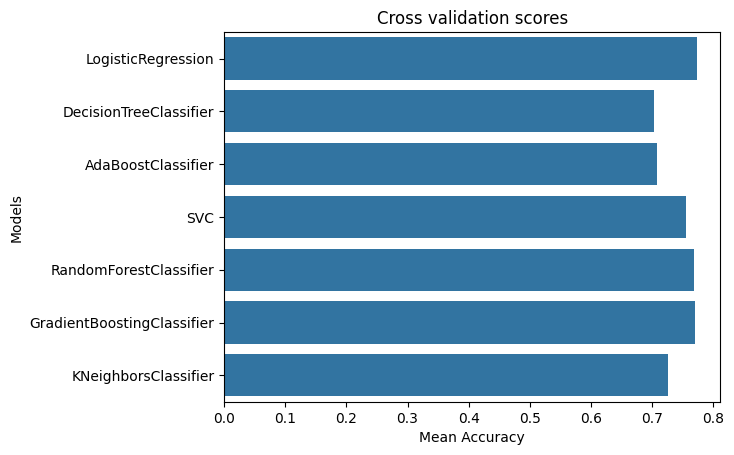

In [56]:
# Modeling fonte : https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook

from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

## Separate train dataset and test dataset
features = data.drop(["Outcome"], axis=1)
labels = data["Outcome"]
# x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)
#
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)
#train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=2)

print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

#
# Cross validate models

def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = train_x, y = train_y, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

    # Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

##**7 Hyperparameter Tuning NEARMISS**

In [57]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = test_y, grid_result.predict(test_x)
    print(classification_report(y_true, y_pred))
    print()

In [58]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(train_x, train_y)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7763636363636364
0.776 (+/-0.253) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776 (+/-0.253) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.776 (+/-0.253) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776 (+/-0.253) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.254) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773 (+/-0.259) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.769 (+/-0.246) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.763 (+/-0.264) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.756 (+/-0.216) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759 (+/-0.265) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1  

In [59]:
# Define models and parameters for SVC
model = SVC()

# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(train_x, train_y)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

Tuned hyperparameters: (best parameters)  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy : 0.7821741663430062
0.657 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.657 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.773 (+/-0.059) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.657 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.782 (+/-0.055) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.773 (+/-0.059) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.769 (+/-0.051) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.780 (+/-0.059) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.778 (+/-0.062) for {'C': 1, 'kernel': 'linear'}
0.780 (+/-0.059) for {'C': 10, 'kernel': 'linear'}
0.782 (+/-0.055) for {'C': 100, 'kernel': 'linear'}
0.782 (+/-0.055) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       147
           1   

In [60]:
# Define models and parameters for  Random forest
model = RandomForestClassifier(random_state=42)


# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(train_x, train_y)

# SVC Hyperparameter Result
analyze_grid_result(grid_result)

Tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy : 0.7784497586417356
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.762 (+/-0.051) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.758 (+/-0.059) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.758 (+/-0.036) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.765 (+/-0.044) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.764 (+/-

In [61]:
# prediction
y_pred = logi_result.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.73      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [33]:
# https://www.kaggle.com/gopalj/diabetes-prediction-using-python/notebook
# outros metodos

#comprar dado com
# dados faltantes analise

#**Feature Engineering**

##**0 Balanceamento por - Feature Engineering**

Engenharia de features – Consiste em gerar novas features dando maior robustez ao modelo e diminuindo o viés da classe majoritária.


https://www.kaggle.com/singhdatascientist/diabetes-prediction-with-ann/notebook

Outros

https://www.kaggle.com/gopalj/diabetes-prediction-using-python


https://www.kaggle.com/imdevez/pima-indians-diabetes-eda-prediction-0-941


https://www.kaggle.com/uciml/pima-indians-diabetes-database/code

